In [1]:
import pandas as pd
import plotly.express as px

In [2]:
Banks = pd.read_csv('../Datasets Clean/bankslocalidades.csv')
ATMs = pd.read_csv('../Datasets Clean/ATMslocalidades.csv')
Health = pd.read_csv('../Datasets Clean/healthlocalidades.csv')
Pharmacies = pd.read_csv('../Datasets Clean/PharmaciesLocalidades.csv')
SITP = pd.read_csv('../Datasets Clean/SITPLocalidades.csv')
TM = pd.read_csv('../Datasets Clean/TMLocalidades.csv')

In [3]:
df1 = Banks.Localidad.value_counts().to_frame().rename(columns={'Localidad':'Bancos'})
df2 = ATMs.Localidad.value_counts().to_frame().rename(columns={'Localidad':'ATMs'})
df3 = Health.Localidad.value_counts().to_frame().rename(columns={'Localidad':'Puntos Salud'})
df4 = Pharmacies.Localidad.value_counts().to_frame().rename(columns={'Localidad':'Farmacias'})
df5 = SITP.Localidad.value_counts().to_frame().rename(columns={'Localidad':'SITP'})
df6 = TM.Localidad.value_counts().to_frame().rename(columns={'Localidad':'TM'})

In [4]:
DF = pd.concat([df1,df2,df3,df4,df5,df6],axis=1)

<AxesSubplot:xlabel='index', ylabel='Chapinero'>

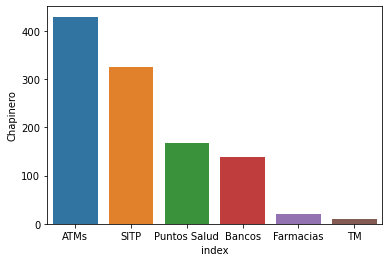

In [5]:
import seaborn as sns

sns.barplot(data=DF.loc['Chapinero'].to_frame().sort_values(by='Chapinero',ascending=False).reset_index(),x='index',y='Chapinero')

In [6]:
DF.loc['Chapinero'].to_frame().reset_index()

,index,Chapinero
0,Bancos,138.0
1,ATMs,430.0
2,Puntos Salud,167.0
3,Farmacias,21.0
4,SITP,325.0
5,TM,10.0


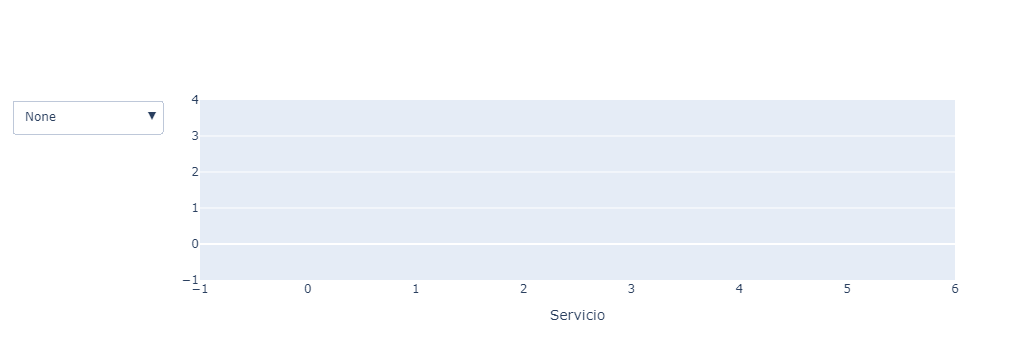

In [15]:
import plotly.graph_objects as go
import plotly.io as pio

fig = go.Figure()

Localidades = DF.index.tolist()

for Localidad in DF.index:
    
    DF2 = DF.loc[Localidad].to_frame().sort_values(by=Localidad,ascending=False).reset_index()
    fig.add_trace(go.Bar(x=DF2['index'],y=DF2[Localidad],name=Localidad))
    #fig.Layout(xaxis_title='Servicio')

VisibleAll = [True]*len(DF)
VisibleNone = [False]*len(DF)

ConfigButtons = [dict(label = 'None',
                     method = 'update',
                     args = [{'visible':VisibleNone},
                             {'title':'None'},
                             {'showlegend':True}])]

ConfigButtonsAll = dict(label = 'All',
                         method = 'update',
                         args = [{'visible':VisibleAll},
                                 {'title':'All'},
                                 {'showlegend':True}])

ConfigButtons.append(ConfigButtonsAll)

for i, Localidad in enumerate(Localidades):

    VisibleLoc = [False]*len(Localidades)
    VisibleLoc[i] = True
    ConfigButton = dict(label = Localidad,
                     method = 'update',
                     args = [{'visible':VisibleLoc},
                             {'title':Localidad},
                             {'showlegend':True}])
    ConfigButtons.append(ConfigButton)
    
fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons= list(ConfigButtons),
        )],
xaxis_title='Servicio'
)

fig.update_traces(visible=False)